In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

# Question 3

County Data

In [ ]:
ranked_data.set_index('FIPS', inplace=True)

In [ ]:
county_data = (ranked_data[['FIPS', 'County', 'State', 'Alcohol-impaired driving deaths', 'Driving alone to work']]).sort_values(by=['State', 'County'])
county_data

County    State   Alcohol-impaired driving deaths                   \
                         # Alcohol-Impaired Driving Deaths # Driving Deaths   
FIPS                                                                          
1001    Autauga  Alabama                              18.0             56.0   
1003    Baldwin  Alabama                              57.0            177.0   
1005    Barbour  Alabama                              12.0             32.0   
1007       Bibb  Alabama                               6.0             28.0   
1009     Blount  Alabama                              14.0             93.0   
...         ...      ...                               ...              ...   
56039     Teton  Wyoming                               2.0             11.0   
56041     Uinta  Wyoming                               4.0             23.0   
56043  Washakie  Wyoming                               0.0              6.0   
56045    Weston  Wyoming                               2.0              9.0   
56000       NaN  Wyoming                             197.0            620.0   

                                                                            \
      % Driving Deaths with Alcohol Involvement 95% CI - Low 95% CI - High   
FIPS                                                                         
1001                                  32.142857    25.218646     39.119228   
1003                                  32.203390    28.423816     36.009852   
1005                                  37.500000    28.328682     46.401415   
1007                                  21.428571    11.834453     32.271276   
1009                                  15.053763    10.196675     20.617359   
...                                         ...          ...           ...   
56039                                 18.181818     4.410894     36.707009   
56041                                 17.391304     7.475057     29.676050   
56043                                  0.000000     0.000000     28.246769   
56045                                 22.222222     5.885476     42.287216   
56000                                 31.774194    29.791011     33.768597   

               Driving alone to work               ...  \
      Quartile % Drive Alone to Work 95% CI - Low  ...   
FIPS                                               ...   
1001       3.0             86.708886    84.314202  ...   
1003       3.0             82.996560    81.352636  ...   
1005       4.0             84.032729    81.095094  ...   
1007       1.0             87.652646    84.409132  ...   
1009       1.0             88.341580    86.134480  ...   
...        ...                   ...          ...  ...   
56039      1.0             66.272068    61.193163  ...   
56041      1.0             79.313919    74.589438  ...   
56043      1.0             83.825079    78.956098  ...   
56045      2.0             69.244350    61.863974  ...   
56000      NaN             77.407763    76.684506  ...   

                                                                 \
      % Drive Alone (Asian) 95% CI - High % Drive Alone (Black)   
FIPS                                                              
1001                                  NaN             83.297872   
1003                                  NaN             86.905905   
1005                                  NaN             77.465189   
1007                                  NaN                   NaN   
1009                                  NaN                   NaN   
...                                   ...                   ...   
56039                                 NaN                   NaN   
56041                                 NaN                   NaN   
56043                                 NaN                   NaN   
56045                                 NaN                   NaN   
56000                           80.767081             76.258993   

                                                         

In [ ]:
ids = list(county_data.index)
counties = list(county_data.County)
state = list(county_data.State)

alcohol_deaths_data = list(ranked_data['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'])
driving_alone_data = list(ranked_data['Driving alone to work']['% Drive Alone to Work'])

compressed_data = pd.DataFrame(
    {'FIPS': ids,
    'County': counties,
    'States': state,
    '% Driving Deaths with Alcohol Involvement': alcohol_deaths_data,
    '% Drive Alone to Work': driving_alone_data}
)

The decision that was made here was to convert the necessary values needed into lists and use each of them for an entirely different dataframe.

In [ ]:
compressed_data
compressed_data.set_index('FIPS', inplace=True)

In [ ]:
compressed_data.groupby(by=['States'], as_index=False).mean()

,States,% Driving Deaths with Alcohol Involvement,% Drive Alone to Work
0,Alabama,28.392261,85.438582
1,Alaska,49.778212,47.908456
2,Arizona,23.394361,77.266641
3,Arkansas,25.948215,82.270514
4,California,30.311210,73.108669
5,Colorado,29.930741,71.766686
6,Connecticut,30.843176,78.150441
7,Delaware,25.476971,79.748794
8,District of Columbia,29.054054,32.124298
9,Florida,25.202875,78.840344


In [ ]:
compressed_data

,County,States,% Driving Deaths with Alcohol Involvement,% Drive Alone to Work
FIPS,,,,
1001,Autauga,Alabama,25.886964,84.873103
1003,Baldwin,Alabama,32.142857,86.708886
1005,Barbour,Alabama,32.203390,82.996560
1007,Bibb,Alabama,37.500000,84.032729
1009,Blount,Alabama,21.428571,87.652646
...,...,...,...,...
56039,Teton,Wyoming,18.333333,75.677198
56041,Uinta,Wyoming,18.181818,66.272068
56043,Washakie,Wyoming,17.391304,79.313919


In [ ]:
compressed_data['Difference in Percentage'] = compressed_data['% Drive Alone to Work'] - compressed_data['% Driving Deaths with Alcohol Involvement']

n = alt.Chart(compressed_data).mark_rect().encode(
    alt.X('% Driving Deaths with Alcohol Involvement:Q', bin=alt.Bin(maxbins=160)),
    alt.Y('% Drive Alone to Work:Q', bin=alt.Bin(maxbins=160)),
    alt.Color('Difference in Percentage:Q', scale=alt.Scale(scheme='greenblue'))
)
n

alt.Chart(...)

Our findings show that there isn't much of a correlation with alcohol related driving deaths with people that drive alone to work. 


*   The average is ranges between (8% - 45%) of people dying while drinking and driving with around (70% - 90%) of people driving alone. 

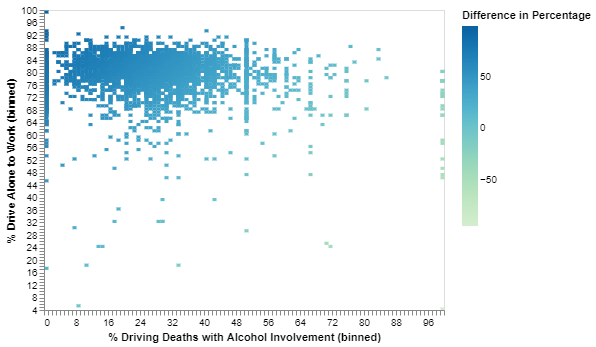


In [ ]:
top_findings_data = compressed_data.dropna()

In [ ]:
top_findings_data.sort_values(by=["Difference in Percentage"], ascending=False, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
top_findings_data = top_findings_data[abs(top_findings_data['Difference in Percentage']) <= 30]

In [ ]:
top_findings_data

,County,States,% Driving Deaths with Alcohol Involvement,% Drive Alone to Work,Difference in Percentage
FIPS,,,,,
8081,Moffat,Colorado,33.333333,63.318777,29.985444
26137,Otsego,Michigan,46.153846,76.130930,29.977084
51670,Hopewell City,Virginia,38.095238,67.867457,29.772219
55127,Walworth,Wisconsin,50.000000,79.668724,29.668724
13265,Taliaferro,Georgia,57.142857,86.789494,29.646637
...,...,...,...,...,...
46117,Stanley,South Dakota,100.000000,74.660933,-25.339067
31087,Hitchcock,Nebraska,100.000000,73.893805,-26.106195
27071,Koochiching,Minnesota,100.000000,73.420683,-26.579317


In [ ]:
q = alt.Chart(top_findings_data).mark_rect().encode(
    alt.X('% Driving Deaths with Alcohol Involvement:Q', bin=alt.Bin(maxbins=160)),
    alt.Y('% Drive Alone to Work:Q', bin=alt.Bin(maxbins=160)),
    alt.Color('Difference in Percentage:Q', scale=alt.Scale(scheme='greenblue'))
)
q

alt.Chart(...)

Our findings of the counties that had a difference in percentage of less than 20%. 


```
The difference refering to 
- % of Driving Deaths with Alcohol Involvement
- % of Driving Alone to Work
```
shows that not many counties have a strong correlation between the two categories.


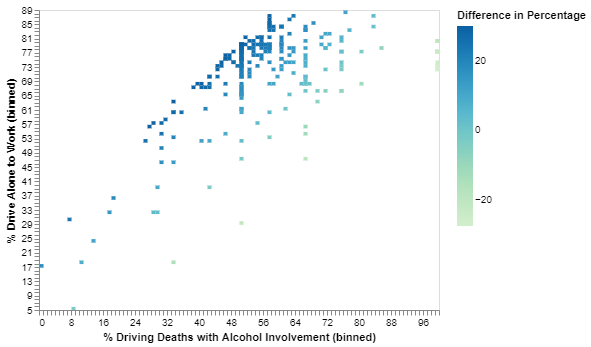


In [ ]:
compressed_data.groupby('States').mean()

,% Driving Deaths with Alcohol Involvement,% Drive Alone to Work,Difference in Percentage
States,,,
Alabama,28.392261,85.438582,57.046321
Alaska,49.778212,47.908456,-1.744398
Arizona,23.394361,77.266641,53.872280
Arkansas,25.948215,82.270514,56.322299
California,30.311210,73.108669,42.797459
Colorado,29.930741,71.766686,41.835945
Connecticut,30.843176,78.150441,47.307265
Delaware,25.476971,79.748794,54.271822
District of Columbia,29.054054,32.124298,3.070244


State Data

In [ ]:
alcohol_death_by_state = dict((ranked_data.groupby(by=['State']).mean())['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'])

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
driving_alone_by_state = dict((ranked_data.groupby(by=['State']).mean())['Driving alone to work']['% Drive Alone to Work'])

In [ ]:
full_data = {}

keys = set(list(alcohol_death_by_state.keys()) + list(driving_alone_by_state.keys()))

for key in keys:
  items = []
  items += [alcohol_death_by_state[key]] if key in alcohol_death_by_state else []
  items += [driving_alone_by_state[key]] if key in driving_alone_by_state else []
  full_data[key] = items

In [ ]:
full_data

alcho_data = pd.DataFrame(data=full_data)

In [ ]:
alcho_data = alcho_data.T
alcho_data.rename(columns={0: '% of Alcohol Deaths', 1: '% of Driving Alone'}, inplace=True)

In [ ]:
alcho_data.sort_index(inplace=True)

In [ ]:
alcho_data

,% of Alcohol Deaths,% of Driving Alone
Alabama,28.392261,85.438582
Alaska,49.778212,47.908456
Arizona,23.394361,77.266641
Arkansas,25.948215,82.270514
California,30.311210,73.108669
Colorado,29.930741,71.766686
Connecticut,30.843176,78.150441
Delaware,25.476971,79.748794
District of Columbia,29.054054,32.124298
Florida,25.202875,78.840344


In [ ]:
alcho_data.reset_index(inplace=True)

In [ ]:
alcho_data = alcho_data.rename(columns={'index': 'States'})

In [ ]:
alcho_data['id'] = list(alcho_data.index)

In [ ]:
alcho_data['id'] += 1

In [ ]:
correlation = []
for x, y in zip(list(alcho_data['% of Alcohol Deaths']), list(alcho_data['% of Driving Alone'])):
  n = y - x
  correlation.append(n)

alcho_data['Correlation'] = correlation

In [ ]:
class State_Data:
  """Data findings from states"""

  def __init__(self):
    self.y_values = ['% of Alcohol Deaths', '% of Driving Alone']

  def show_chart(self, name):
    """Displays a chart"""
    c = alt.Chart(alcho_data).mark_bar(outerRadius=80).encode(
        x='States',
        y=name,
        color='Correlation:Q'
    )
    return c

s = State_Data()
s.show_chart(s.y_values[0])

alt.Chart(...)

The chart displays the percentage of alcohol deaths that occur on average occur within each state.

*  Lighter Shade- Higher correlation with % of alcohol deaths and % of driving 
*  Darker Shade - Higher correlation with % of alcohol deaths and % of driving alone

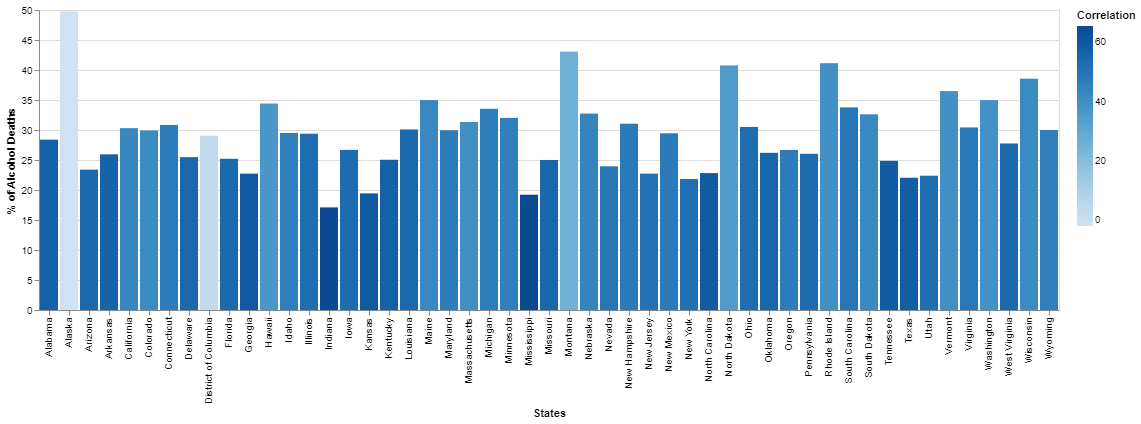

In [ ]:
s.show_chart(s.y_values[1])

alt.Chart(...)

The chart displays the percentage of people driving alone that occur on average occur within each state.

*  Lighter Shade- Higher correlation with % of alcohol deaths and % of driving 
*  Darker Shade - Higher correlation with % of alcohol deaths and % of driving alone

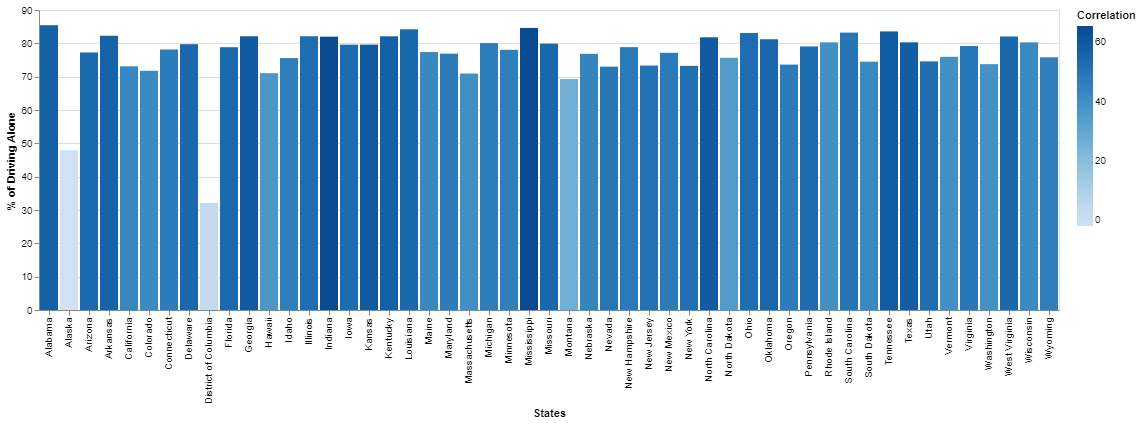

Question 4

In [ ]:
inactive_data = ranked_data['Physical inactivity']['% Physically Inactive']
inactive_data = list(inactive_data)

In [ ]:
obesity_data = ranked_data['Adult obesity']['% Adults with Obesity']
obesity_data = list(obesity_data)

In [ ]:
correlation = pd.DataFrame({'Inactive rates': inactive_data, 'Obesity rates': obesity_data})

In [ ]:
Chart(correlation).mark_circle().encode(
    x='Inactive rates',
    y='Obesity rates',
    color='Obesity rates'
)

alt.Chart(...)

The scatter plot shows that countries tend
to have obesity rates between 25% to 45% which
correlates with the inactivity rates containing 
approximately the same percentage. (20% - 45%)

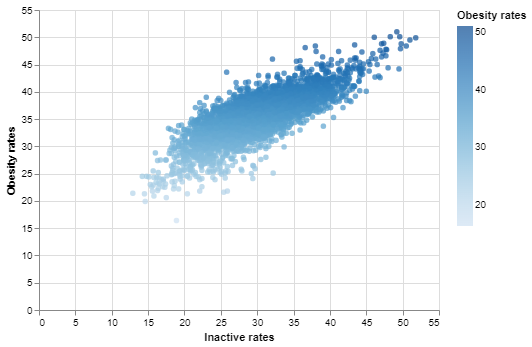

In [ ]:
correlation['Inactive rates'].corr(correlation['Obesity rates'])

0.793112176532064

The correlation between both rates also shows that there is 
a correlation of nearly 80% between the two data sets.